<a href="https://colab.research.google.com/github/Guddi1999/Sales_Channel_Profitability_Project_using_ML_Algorithm/blob/main/Channel_Profitability_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Sales Channel Profitability Comparison ***

Summary data of three distribution channels — Online, Retail, and Wholesale — with the following features:

Category

Average of Profit_Margin_%

Average of Customer_Rating

Since this is already aggregated (pivoted) data, my goal isn't to build a predictive model in the traditional sense (like predicting future profit margins from raw data), but rather to:

📊 Perform comparative analysis and possibly cluster the channels to identify performance patterns.




**Loaded the Excel Data and converted the Pivot Table into Tabular Data Table**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




In [ ]:
import pandas as pd

# Step 1: Load the Excel file
file_path = '/content/Pivot Data.xlsx'  # Make sure this file is in the same folder as the script
df_raw = pd.read_excel(file_path, sheet_name='Pivot Data')

# Step 2: Initialize the list to store cleaned rows
cleaned_rows = []
current_category = None

# Step 3: Loop through the pivot rows and build the cleaned dataset
for index, row in df_raw.iterrows():
    row_label = row['Row Labels']
    profit = row['Average Profit_Margin']
    rating = row['Average of Customer_Rating']

    if pd.isna(profit) and pd.isna(rating):
        continue  # Skip empty rows

    # Detect category rows
    if row_label in ['Beverages', 'Home Care', 'Personal Care', 'Snacks']:
        current_category = row_label
    elif row_label == 'Grand Total':
        continue  # Skip total row
    else:
        # This is a channel under a category
        cleaned_rows.append({
            'Category': current_category,
            'Channel': row_label,
            'Avg_Profit_Margin': profit,
            'Avg_Customer_Rating': rating
        })

# Step 4: Create DataFrame and export to Excel and CSV
df_cleaned = pd.DataFrame(cleaned_rows)

# Save as Excel and CSV
df_cleaned.to_excel('cleaned_channel_profitability.xlsx', index=False)
df_cleaned.to_csv('cleaned_channel_profitability.csv', index=False)

print("Data cleaned and saved as 'cleaned_channel_profitability.xlsx' and '.csv'")


Data cleaned and saved as 'cleaned_channel_profitability.xlsx' and '.csv'


**Model Building in Python**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


**Loading the Cleaned Data**

Here is the tabular data with zero null values and duplicate values

In [ ]:
df = pd.read_csv('/content/cleaned_channel_profitability.csv')
df


,Category,Channel,Avg_Profit_Margin,Avg_Customer_Rating
0,Beverages,Online,14.545455,3.693182
1,Beverages,Retail,15.555556,3.791111
2,Beverages,Wholesale,15.138889,3.877778
3,Home Care,Online,15.833333,3.678571
4,Home Care,Retail,14.883721,3.753488
5,Home Care,Wholesale,14.361702,3.648936
6,Personal Care,Online,15.533333,3.756667
7,Personal Care,Retail,15.649351,3.722078
8,Personal Care,Wholesale,14.411765,3.729412
9,Snacks,Online,15.148515,3.648515


**Feature Selection & Preprocessing**

In [ ]:
features = df[['Avg_Profit_Margin', 'Avg_Customer_Rating']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


**Model Training- using K-means Clustering**

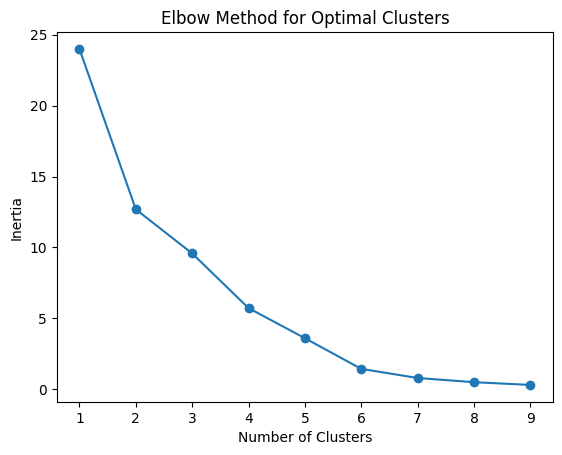

In [ ]:
# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot to find the elbow
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
## Once you choose the optimal number of clusters (say 3), you can train the model:

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)


**Interpreting the Results**

In [ ]:
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}")
    print(df[df['Cluster'] == cluster])



Cluster 0
        Category    Channel  Avg_Profit_Margin  Avg_Customer_Rating  Cluster
0      Beverages     Online          14.545455             3.693182        0
4      Home Care     Retail          14.883721             3.753488        0
8  Personal Care  Wholesale          14.411765             3.729412        0

Cluster 2
        Category    Channel  Avg_Profit_Margin  Avg_Customer_Rating  Cluster
1      Beverages     Retail          15.555556             3.791111        2
2      Beverages  Wholesale          15.138889             3.877778        2
3      Home Care     Online          15.833333             3.678571        2
6  Personal Care     Online          15.533333             3.756667        2
7  Personal Care     Retail          15.649351             3.722078        2

Cluster 1
     Category    Channel  Avg_Profit_Margin  Avg_Customer_Rating  Cluster
5   Home Care  Wholesale          14.361702             3.648936        1
9      Snacks     Online          15.148515      

**Cluster-Wise Interpretation:**

**Cluster 0: Consistently Moderate:**

📌 **Insight:**
This cluster includes channels with moderate profit margins and decent customer ratings, all hovering close to 14.5% profit and 3.7 rating.

These channels are stable performers—not exceptional, but reliable.

Could serve as baseline options with low volatility/risk.

✅ Strategy:
Consider these for sustaining product lines, or when testing new SKUs with minimal risk.

Try increasing promotions to boost either profit or ratings.



**Cluster 1: Lower Rating Risk**
📌 **Insight:**
These channels have decent profit margins (~15%), but slightly lower customer ratings (~3.65).

Dominated by snack products, especially in wholesale and online settings.

⚠️ **Strategy:**
Could be profitable but underwhelming in experience—maybe due to packaging, delivery, or branding.

Focus on customer engagement improvements here—sampling, better labeling, customer service, etc.

**Cluster 2: High Performers**
📌 **Insight:**
This cluster has the highest profit margins and relatively high ratings, especially in beverages and personal care.

Most channels are retail and online, meaning they are accessible and scalable.

✅ **Strategy:**
These are ideal channels for launching new products, especially if you’re aiming for profitability + customer satisfaction.

Double down on these—invest in ads, shelf space, influencer tie-ups, etc.



** Builded Recommendation Function Template **

In [ ]:
def recommend_best_channels(df, top_n=3):
    # Sort by both metrics
    return df.sort_values(by=['Avg_Profit_Margin', 'Avg_Customer_Rating'], ascending=False).head(top_n)

top_channels = recommend_best_channels(df)
print(top_channels)


        Category Channel  Avg_Profit_Margin  Avg_Customer_Rating  Cluster
3      Home Care  Online          15.833333             3.678571        2
7  Personal Care  Retail          15.649351             3.722078        2
1      Beverages  Retail          15.555556             3.791111        2


**Scaling this Analysis in near Future:**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def recommend_channels(file_path='/content/cleaned_channel_profitability.csv', top_n=5, cluster_focus='top'):
    """
    Load cleaned channel data, perform clustering, and recommend top channels.

    Parameters:
    - file_path: path to the cleaned CSV file
    - top_n: number of top recommendations
    - cluster_focus: 'top' for high performers, 'all' for global ranking

    Returns:
    - DataFrame of recommended channels
    """

    # Load the data
    df = pd.read_csv('/content/cleaned_channel_profitability.csv')

    # Feature scaling
    features = df[['Avg_Profit_Margin', 'Avg_Customer_Rating']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(features_scaled)

    # Determine cluster ranking based on average profit + rating
    cluster_scores = df.groupby('Cluster')[['Avg_Profit_Margin', 'Avg_Customer_Rating']].mean()
    cluster_scores['Total_Score'] = cluster_scores.sum(axis=1)
    ranked_clusters = cluster_scores.sort_values(by='Total_Score', ascending=False).index.tolist()

    # Filter based on top cluster if specified
    if cluster_focus == 'top':
        top_cluster = ranked_clusters[0]
        df_filtered = df[df['Cluster'] == top_cluster]
    else:
        df_filtered = df.copy()

    # Recommend top N based on profit and rating
    recommended = df_filtered.sort_values(
        by=['Avg_Profit_Margin', 'Avg_Customer_Rating'],
        ascending=False
    ).head(top_n)

    return recommended


✅ **Goal:**
Build a function that:

Re-loads and preprocesses our cleaned data.

Performs clustering or scoring.

Recommends the best channels based on profitability and customer rating.

Can be reused for future analysis as new data is added.



**Actionable Steps to take for Cluster 0 to improve Profitability**


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(cluster0_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[cluster0_table[col] for col in cluster0_table.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Cluster 0 - Actionable Insights Table")
fig.show()
